## <FONT COLOR = 'BLUE'>THERE ARE FOUR STEPS OF THE LINEAR REGRESSION</FONT>
- **STEP 1 :READING AND UDERSTANDING THE DATA**
- **STEP 2 :TRAINING THE MODEL**
- **STEP 3 :RESIDUAL ANALYSIS**
- **STEP 4 :PREDICITING THE TEST SETS AND EVALUVATING THE TEST SETS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score

### STEP 1 <FONT COLOR='RED' FONT SIZE='5' >READING AND UNDERSTANDING THE DATA</FONT>
   - **1.<FONT COLOR='GREEN' >READING AND UNDERSTANDING THE DATA</FONT>**
   - **2.<FONT COLOR='GREEN' >DATA CLEANING</FONT>**
        - **2.1 <FONT COLOR='BLUE' >MISSING VALUES ETC....</FONT>**
   - **3. <FONT COLOR='GREEN' >DATA VISUALISATION</FONT>**
   
**THESE ARE THE SOME BASIC STEPS TO MAKE DATA CLEAN AND GOOD**

In [2]:
df_day=pd.read_csv('Day1.csv')
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df_day.shape

(730, 16)

###   <FONT COLOR='RED'>ASSUMPTION 1 OF LINEAR REGRESSION </FONT>
- **HAS A LINEAR RELATION SHIP BETWEEN X AND Y**

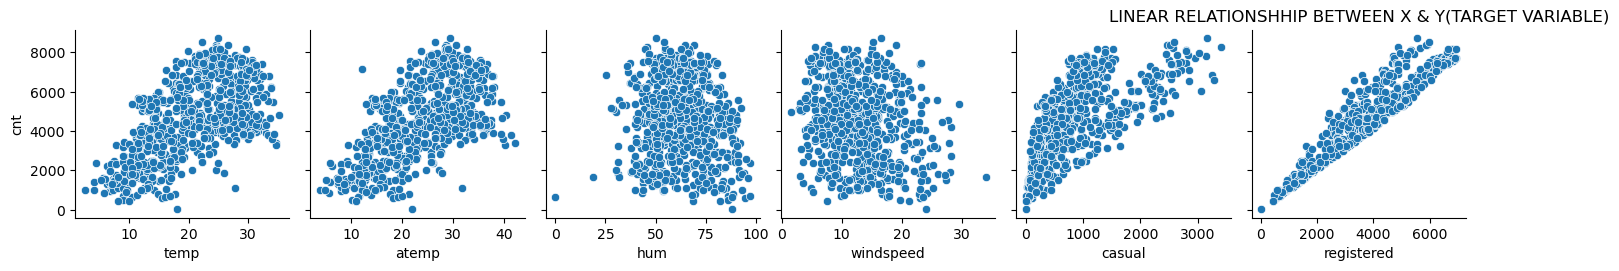

In [7]:
# plt.subplots(2,1)
sns.pairplot(data=df_day,x_vars=['temp','atemp','hum','windspeed','casual','registered'],y_vars='cnt')
plt.title('LINEAR RELATIONSHHIP BETWEEN X & Y(TARGET VARIABLE)')
plt.show()

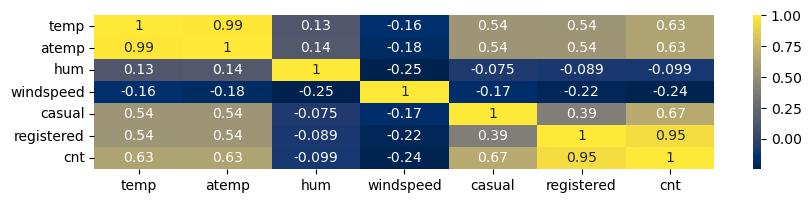

In [8]:
plt.figure(figsize=(10,2))
sns.heatmap(data=df_day[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(),annot=True,cmap='cividis')
plt.show()

- **EXPLAINING ABOUT THE DATA**
    - **WE HAVE 730 ROWS AND 16 COLUMNS**
    - **THE INSTANT COLUMN REPRESENTED ONLY THE HOW MANY PEOPLE VISITED IT HAS INDEX VALUE SO WE CAN DROP THIS**
    - **WE HAVE DTEDAY COLUMN BASICALLY WE HAVE YEAR MONTH COLUMN SO WE CAN DROP THIS COLUMN**
    - **NEXT CNT WHICH IS OUR TARGET VARIABLE THAT IS OBTAINED FROM ADDING THE CASUAL AND REGISTERED**


In [9]:
# changing the dtedate colum to date time
df_day['dteday']=pd.to_datetime(df_day['dteday'])
df_day['weekend']=pd.DatetimeIndex(df_day['dteday']).day_name()
# we have replace 0 for not is weekend and 1 is for weekeend
df_day['weekend']=df_day['weekend'].replace(['Monday','Tuesday','Wednesday','Thursday','Friday'],0).replace(['Saturday','Sunday'],1)

In [10]:
# # DROPPING THOUSE COLLUMNS WHICH WE NOT REQUIRED
# df_day=df_day.drop(['instant','dteday','casual','registered'],axis=1)
# renameing the columns
df_day.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count','weathersit':'weather'},inplace=True)

## <font color = 'BLUE'> PERFORMING THE EDA </FONT>
- **FROM THE COLUMNS WE HAVE OBSERVED THAT THE COLUMNS ARE DIFFERENT TYPES**
   - **BINARY VARIABLES LIKE :  YEAR HOLIDAY WORKING DAY**
   - **NUMARICAL VARIABLES LIKE TEMP,ATEMP, HUMIDITY,WINDSPEED,COUNT**
   - **CATAGORICAL VARIABLE : SEASON ,MONTH ,WEEKDAY AND WEAHTER**
- **BUT FROM THE DATA DICTONARY SOME COLUMNS REPRESENTED CATOGORICAL VARIBLES**
- **creating a new data frame thouse column we we need**

In [11]:
# creating a new data frame thouse column we we need

df_day.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count', 'weekend'],
      dtype='object')

In [12]:
col=['season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'count', 'weekend']
df_day_new=df_day[col]
df_day_new.head(4)

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,weekend
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0


 **CHANGING THE NAME OF THE SEASONS WHICH IS GIVEN IN THE DATA DICTONARY**
 - **season : season (1:spring, 2:summer, 3:fall, 4:winter)**
 - **MAPPING THE ELEMENTS OF THE SEASON**

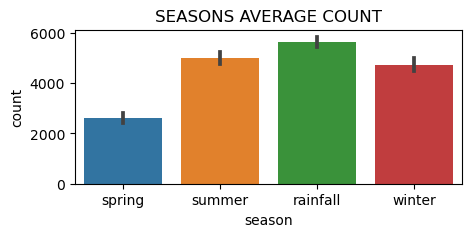

In [13]:


df_day_new['season']=df_day_new['season'].map({1:'spring',2:'summer',3:'rainfall',4:'winter'})
plt.figure(figsize=(5,2))
sns.barplot(x=df_day_new['season'],y=df_day_new['count'])
plt.title('SEASONS AVERAGE COUNT')
plt.show()

- **FROM THE GRAPH WE HAVE OBSERVED THAT THERE IS VERY HIGH DEMEND OF BIKE IN RAINY SEASON**
- **THERE IS A VERY LESS DEMAND IN SPRING AND WHERE AS SOME DEMAND IN SUMMER AND WINTER SEASON**

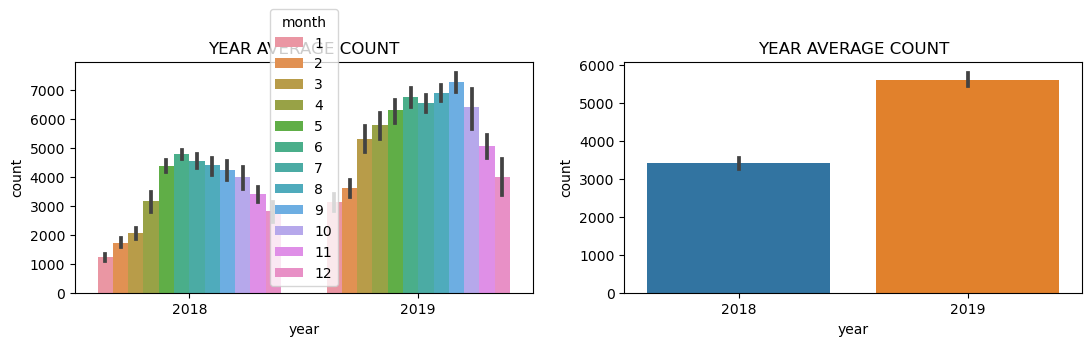

In [14]:
# - yr : year (0: 2018, 1:2019)
# apply map func for  year column
df_day_new['year']=df_day_new['year'].map({0 : 2018, 1:2019})
plt.figure(figsize=(13,3))
plt.subplot(1,2,1)
sns.barplot(x=df_day_new['year'],y=df_day_new['count'],hue=df_day_new.month,)
plt.title('YEAR AVERAGE COUNT')
plt.subplot(1,2,2)
sns.barplot(x=df_day_new['year'],y=df_day_new['count'])
plt.title('YEAR AVERAGE COUNT')
plt.show()

- **AS WE SEE THE YEAR GRAPH THERE IS HUGE DEMAND IN THE YEAR 2019 AS WE COMPARE TO THE 2018 THE DEMAND OF BIKE IS INCRESED HALF HALF THE RANGE**
- **WE CAN SEE THAT EVERY MONTH IS GOES ON INCREASING IN THE YEAR 2019**
- **MONTH ALSO IMPORTANT IN WHICH YEAR HOW MUCH DEMAND WAS THERE FOR BIKE**

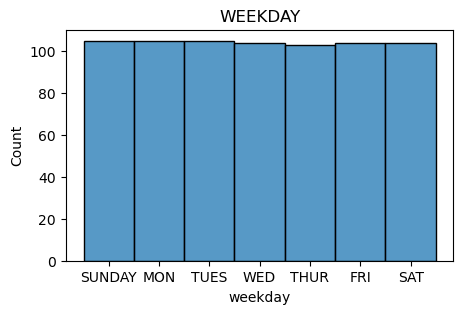

In [15]:
#CHNAGE NAMES OF THE WEEK DAY
df_day_new['weekday'] =df_day_new['weekday'].map({0:'MON',1:'TUES',2:'WED',3:'THUR',4:'FRI',5:'SAT',6:'SUNDAY'})
plt.figure(figsize=(5,3))
sns.histplot(df_day_new['weekday'])
plt.title('WEEKDAY')
plt.show()

- **AS WE SEE THE GRAPPH OF THE WEEKDAY WE SAY THAT THE BIKE DEMAND IS EQUALL BUT THERE IS A SLIGHLTY INCREASE IN**
  - <FONT COLOR= 'RED'>**SUN,MON,TUE,FRI,SAT</FONT>** **AS WE COMPARE TO <FONT COLOR= 'RED'>WED AND THUS</FONT>**

In [16]:
# MAPPING THE WORKING DAYS AND HOLIDAYS COLUMNS 
# AND PERFORMING THE VISUALISATION ON THEM
df_day_new['holiday'] =df_day_new['holiday'].map({0:'no',1:'yes'})
df_day_new['workingday'] =df_day_new['workingday'].map({0:'no',1:'yes'})



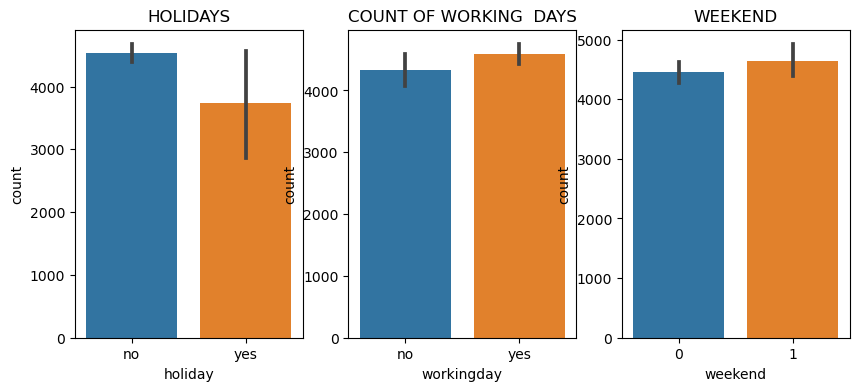

In [17]:
plt.figure(figsize=(10,4))
plt.subplot(1,3,1)

sns.barplot(df_day_new['holiday'],df_day_new['count'])
plt.title('HOLIDAYS')
plt.subplot(1,3,2)
sns.barplot(df_day_new['workingday'],df_day_new['count'])
plt.title('COUNT OF WORKING  DAYS')
plt.subplot(1,3,3)
sns.barplot(df_day_new['weekend'],df_day_new['count'])
plt.title('WEEKEND')

plt.show()

- **FROM THE FOLLOWLING GRAPH OF HOLIDAY & WORKING DAY WE OBSERVED THAT**
    - **1.WHEN THERE IS A HOLIDAY THE DEMAND OF A BIKE IS LESS WHEN COMAPRE TO THE NO HOLIDAY**
    - **2.SIMILARLY WHEN IT IS WORKING DAY THERE IS DEMAND IN THE BIKE AND WHEN IT IS NOT WORKING DAY THERE IS LESS DEMAND**
      - **<FONT COLOR= 'RED'>3.IN WEEKEND "0" INDICATES NOT A WEEKEND LIKE (MON,TUES,....FRI) "1" INDICATES ( SATUR,SUND)</FONT>**
          - **WHEN THERE IS A WEEKEND THE DEMAND IN BIKE IS SLIGHT INCREASED**

# In the data dictionary we have season column we are change them
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy =**GOOD CONDITION**
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist= **LITE GOOD CONDITION**
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds= **LITE BAD CONDITION**
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = **VER YBAD CONDITION**

In [18]:
df_day_new['weather'] =df_day_new['weather'].map({1:'GOOD CONDITION',2:'LITE GOOD CONDITION',3:"LITE BAD CONDITION",4:'VERY BAD CONDITION'})

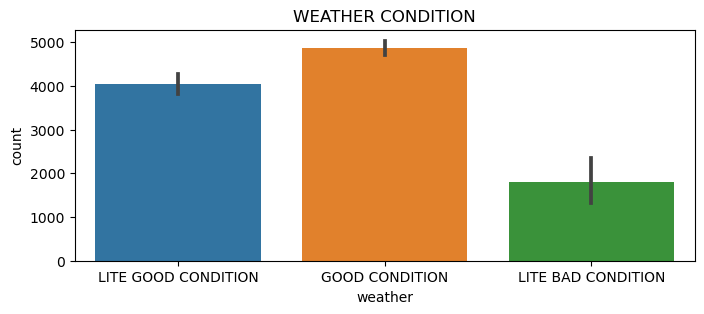

In [19]:
plt.figure(figsize=(8,3))

sns.barplot(df_day_new['weather'],df_day_new['count'])
plt.title('WEATHER CONDITION')
plt.show()

- **WHEN THE WEATHER CONDITION IS <FONT COLOR='BROWN'> GOOD</FONT> THE DEMAND OF A BIKE IS INCREASED A LOT**
- **WHEN THE WEATHER CONDITION IS <FONT COLOR='BROWN'>LITE GOOD</FONT> THE DEMAND OF BIKE IS SOME WHAT LESS COMPARE TO GOOD CONDITION OF WEATHER**
- **WHEN THE WEATHER CONDITION IS <FONT COLOR='BROWN'>LITE BAD</FONT> THE DEMAND OF BIKE IS VERY LOW**
- **WHEN THE WEATHER CONDITION IS <FONT COLOR='BROWN'>VERY BAD</FONT> IT COMPLETELY DISAPPERD INDICATES THAT NO ONE PREFER THE BIKE**

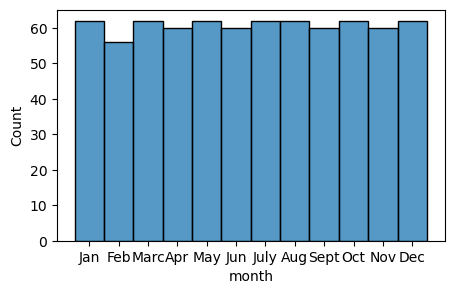

In [20]:
df_day_new['month']=df_day_new['month'].map({1:'Jan',2:'Feb',3:'Marc',4:'Apr',5:'May',6:'Jun',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
plt.figure(figsize=(5,3))
sns.histplot(df_day_new['month'])
plt.show()

- **IF WE SEE THE GRAPH OF MONTH WE KNOW TO KNOW THAT THERE ARE EQUALL AND SOME CHANGES WILL SEEMS TO APPERR IN THE MONTH OF JAN MARCH MAY NOV DEC ARE HIGH**

## RELATION BETWEEN THE NUMERICAL VARIABLES

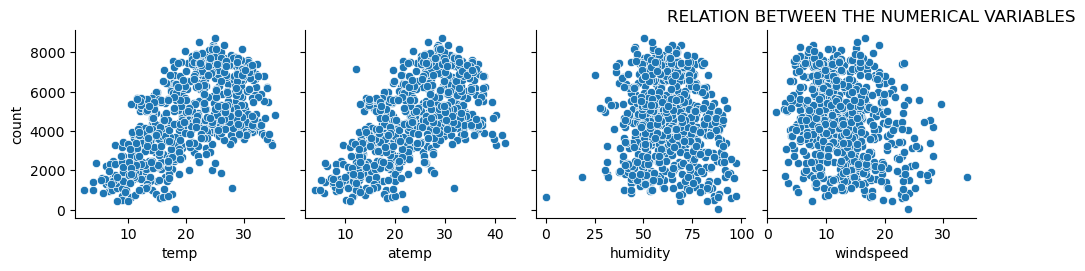

In [21]:


sns.pairplot(data=df_day_new,x_vars=['temp','atemp','humidity','windspeed'],y_vars='count')
plt.title('RELATION BETWEEN THE NUMERICAL VARIABLES')
plt.show()

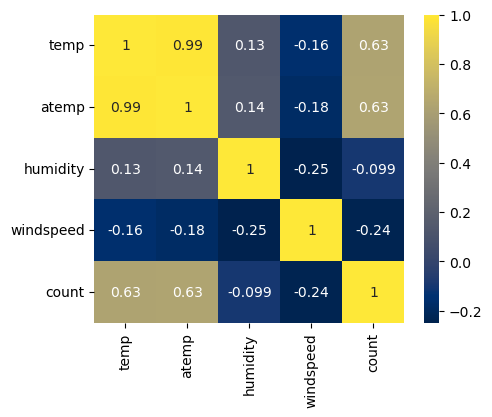

In [22]:
plt.figure(figsize=(5,4))
sns.heatmap(data=df_day[['temp','atemp','humidity','windspeed','count']].corr(),annot=True,cmap='cividis',)
plt.show()

- **BY SEEING THE GRAPH WE SAY THAT TEMP AND ATEMP ARE PERFORMING SOME WHAT CORRELATED TO THE TARGET VARIABLE I.E 0.63**
- **WHERE AS HUMIDITY AND WINDSPEED ARE NOT PERFORMING WELL**

In [23]:
df_day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
 12  weekend     730 non-null    int64  
dtypes: float64(4), int64(3), object(6)
memory usage: 74.3+ KB


In [24]:
df_day_new.head(4)

,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,weekend
0,spring,2018,Jan,no,SUNDAY,no,LITE GOOD CONDITION,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,Jan,no,MON,no,LITE GOOD CONDITION,14.902598,17.68695,69.6087,16.652113,801,0
2,spring,2018,Jan,no,TUES,yes,GOOD CONDITION,8.050924,9.47025,43.7273,16.636703,1349,0
3,spring,2018,Jan,no,WED,yes,GOOD CONDITION,8.200000,10.60610,59.0435,10.739832,1562,0


In [25]:
df_day_new['year']

0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
725    2019
726    2019
727    2019
728    2019
729    2019
Name: year, Length: 730, dtype: int64

- **creating a dummy varible of 2018 & 2019**
- **0 is 2018**
- **1 is 2019**

In [26]:
dummy_year=pd.get_dummies(df_day_new['year'],drop_first=True)
dummy_year.head(5)

,2019
0,0
1,0
2,0
3,0
4,0


In [27]:
# creating a dummy list of thouse varible
dummy_list=['season','month','holiday','weekday' ,'workingday','weather','weekend']
dummy=pd.get_dummies(df_day_new[dummy_list],drop_first=True)
dummy.head(5)

,weekend,season_spring,season_summer,season_winter,month_Aug,month_Dec,month_Feb,month_Jan,month_July,month_Jun,...,holiday_yes,weekday_MON,weekday_SAT,weekday_SUNDAY,weekday_THUR,weekday_TUES,weekday_WED,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0


- **BASICALLY THE DUMMY VARIABLES ARE NOT ADDED TO OUR DATA FRAME SO WE NEED TO ADD TO OUR DATA FRAME IN PANDAS WE HAVE A KEYWORD NAMED <FONT COLOR= 'RED'>PD.CONCAT</FONT>**
- **STEP 2 DROPING THOSE COLUMNSL WHICH WE HAVE CREATED THE DUMMY VARIABLES**

In [28]:
df_day_new=pd.concat([df_day_new,dummy,dummy_year],axis=1)

In [29]:
df_day_new=df_day_new.drop(dummy_list,axis=1)

In [30]:
df_day_new=df_day_new.drop(columns='year',axis=1)

In [31]:
df_day_new.head(4)

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_MON,weekday_SAT,weekday_SUNDAY,weekday_THUR,weekday_TUES,weekday_WED,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION,2019
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [32]:
df_day_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temp                         730 non-null    float64
 1   atemp                        730 non-null    float64
 2   humidity                     730 non-null    float64
 3   windspeed                    730 non-null    float64
 4   count                        730 non-null    int64  
 5   season_spring                730 non-null    uint8  
 6   season_summer                730 non-null    uint8  
 7   season_winter                730 non-null    uint8  
 8   month_Aug                    730 non-null    uint8  
 9   month_Dec                    730 non-null    uint8  
 10  month_Feb                    730 non-null    uint8  
 11  month_Jan                    730 non-null    uint8  
 12  month_July                   730 non-null    uint8  
 13  month_Jun           

#### FINDING THE COORELATION OF THE VARIABLES BY USING HEATMAP

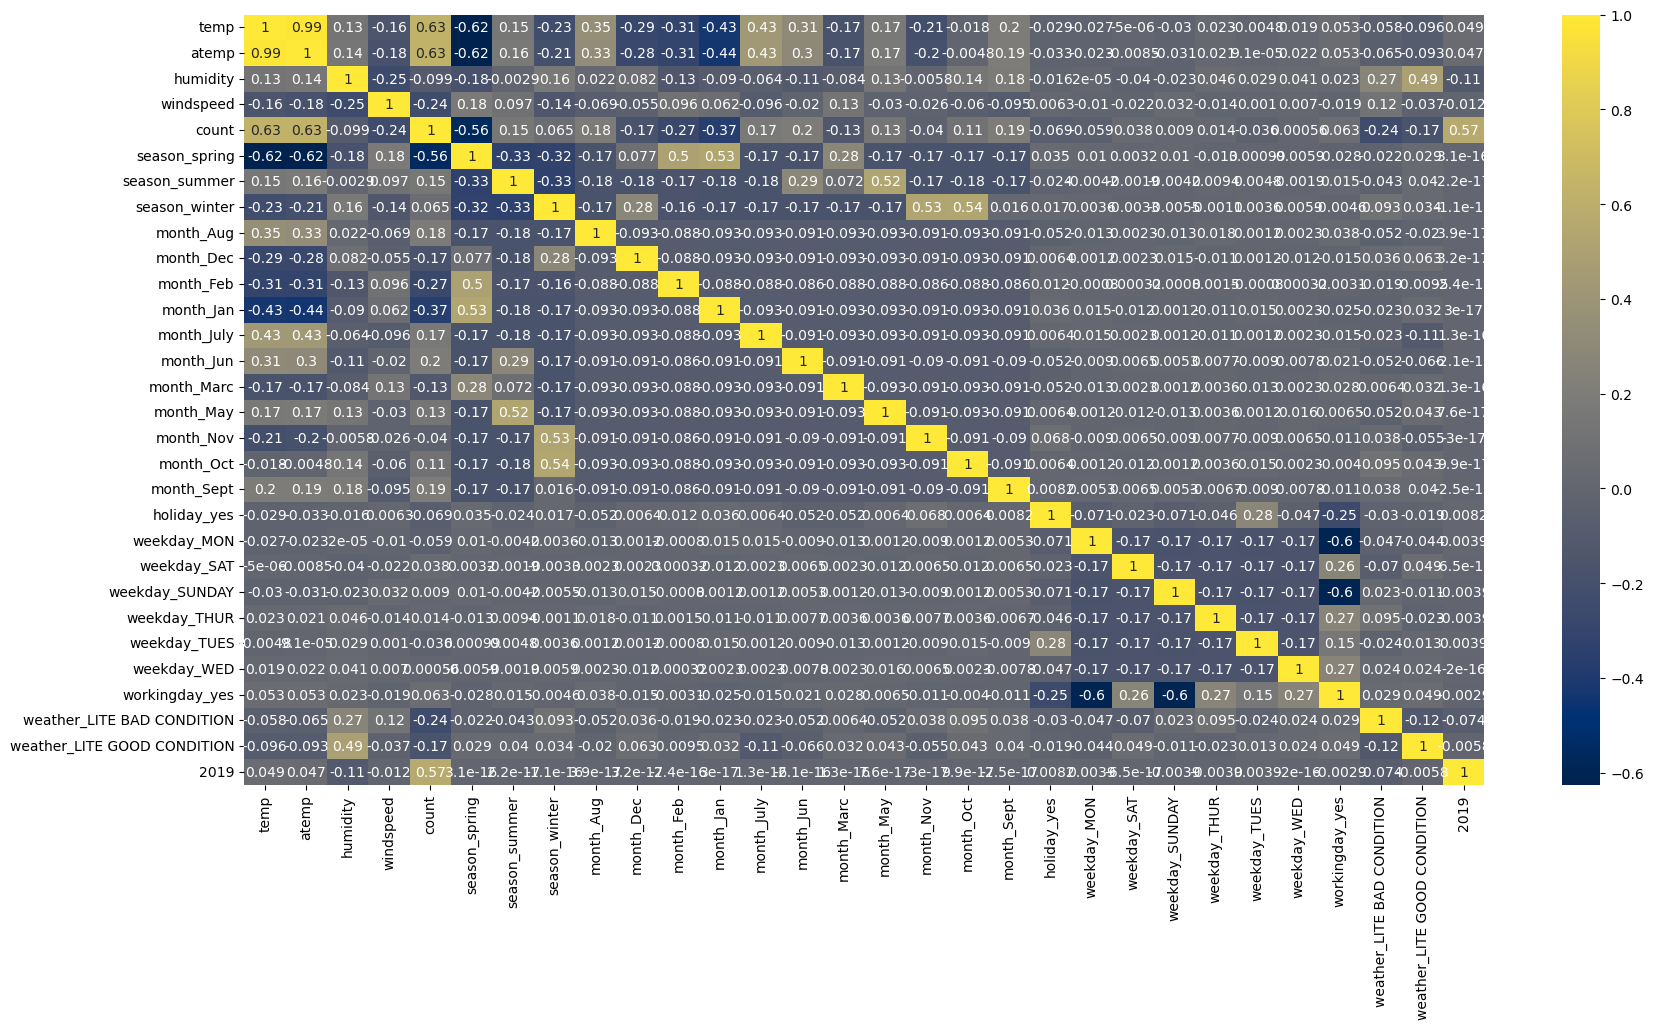

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(df_day_new.corr(),annot=True,cmap='cividis')
plt.show()

# STEP 2 TRAINING THE MODEL

- **WE HAVE TO PERFORM MANY THING WHILE TRAINING THE MODEL**
    - **OUR BASIC EQUATON IS <FONT COLOR='RED'>$ Y=MX+MX_1+MX_2,MX_3+.....MX_N +C$</FONT> HERE THE <FONT COLOR='RED'>$X_1,X_2,X_3...X_N$</FONT> ARE THE COLUMNS WHICH WE HAVE PREDICITED VARIABLE AND <FONT COLOR='RED'>$ M $</FONT> IS A SLOPE OF HAT EQUATION IN OUR TERMS IT IS <FONT COLOR='RED'>TARGET VARIBLE</FONT>**
    - **WE HAVE TO  CREATE A X_TRAIN AND Y_TRAIN FROM THE TRAINING DATA_SETS**
   

### <FONT COLOR='BROWN'>SPLLITING INTO TRAIN AND TEST SPLIT</FONT>
- **IMPORTING SKLEARN LIBARY FROM THAT LIBRARY WE ARE IMPORTING THE TRAIN TEST SPLIT**

In [34]:
import sklearn
from sklearn.model_selection import train_test_split

In [35]:
df_day_new_train ,df_day_new_test=train_test_split(df_day_new,train_size=0.80,test_size=0.20,random_state=100)
print('showing the result of Training data :', df_day_new_train.shape)
print('showing the result of Testing data  :', df_day_new_test.shape)

showing the result of Training data : (584, 30)
showing the result of Testing data  : (146, 30)


## <font color=' brown'>RESCALLING THE FEATURES </font>


In [36]:
scaler=MinMaxScaler()

###  BASICALLY THERE ARE 3 STEPS
- **FIT THE MODEL IT LEARNS XMIN AND XMAX**
- **STEP 2 TRANSFROM IT<font color=red> $\frac{X-XMIN}{XMIN-XMAX}$</font>**
- **STEP 3 FIT_TRANSFORM**

In [37]:
rescale_list=['temp','atemp','humidity','windspeed','count']
df_day_new_train[rescale_list]=scaler.fit_transform(df_day_new_train[rescale_list])
df_day_new_train.head(4)

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_MON,weekday_SAT,weekday_SUNDAY,weekday_THUR,weekday_TUES,weekday_WED,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION,2019
367,0.113228,0.061963,0.454701,0.695175,0.254717,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
648,0.468352,0.462175,0.477458,0.299450,0.868385,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
44,0.443431,0.419099,0.387290,0.807474,0.217556,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
705,0.326094,0.318824,0.787463,0.189819,0.573631,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,1


In [38]:
# importing another library that is statsmodel because we have to add the constants
# in stats model it does not add constanst we to have it we have keyword called add constans
import statsmodels.api as sm

- **WE CAN ADD ONE BY ONE VARIBLE TO PERFORM THE OPERATION BUT IT IS HUGE PROCESS**
- **SO WE CAN ADD WHOLE TRAING MODEL FROM THAT WE CAN REMOVE VARIABLES ACCORDING TO US**

## DIVIDING X AND Y TERMS

In [39]:
# creating X_train and y_train
y_train=df_day_new_train.pop('count')
X_train=df_day_new_train

In [40]:
# adding constants
X_train_sm=sm.add_constant(X_train)
# fitting the model

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()

In [41]:
lr_model.params

const                          0.237439
temp                           0.382470
atemp                          0.068022
humidity                      -0.144362
windspeed                     -0.178924
season_spring                 -0.056389
season_summer                  0.041370
season_winter                  0.108210
month_Aug                      0.018583
month_Dec                     -0.051926
month_Feb                     -0.028666
month_Jan                     -0.058708
month_July                    -0.033777
month_Jun                      0.010519
month_Marc                     0.002937
month_May                      0.018936
month_Nov                     -0.050210
month_Oct                      0.013229
month_Sept                     0.077910
holiday_yes                    0.002900
weekday_MON                    0.040014
weekday_SAT                    0.010084
weekday_SUNDAY                 0.100563
weekday_THUR                   0.002573
weekday_TUES                  -0.014654


In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     120.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.26e-215
Time:                        10:48:20   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1169.
Df Residuals:                     555   BIC:                            -1042.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2374      0.033      7.191      0.000       0.173       0.302
temp                            0.3825      0.135      2.828      0.005       0.117       0.648
atemp                           0.0680      0.133      0.510      0.610      -0.194       0.330
humidity                       -0.1444      0.036     -3.993      0.000      -0.215      -0.073
windspeed                      -0.1789      0.024     -7.352      0.000      -0.227      -0.131
season_spring                  -0.0564      0.027     -2.068      0.039      -0.110      -0.003
season_summer                   0.0414      0.024      1.719      0.086      -0.006       0.089
season_winter                   0.1082      0.025      4.381      0.000       0.060       0.157
month_Aug                       0.0186      0.031      0.599      0.550      -0.042       0.080
month_Dec                      -0.0519      0.031     -1.690      0.092      -0.112       0.008
month_Feb                      -0.0287      0.030     -0.945      0.345      -0.088       0.031
month_Jan                      -0.0587      0.031     -1.875      0.061      -0.120       0.003
month_July                     -0.0338      0.032     -1.053      0.293      -0.097       0.029
month_Jun                       0.0105      0.023      0.467      0.641      -0.034       0.055
month_Marc                      0.0029      0.023      0.125      0.900      -0.043       0.049
month_May                       0.0189      0.019      0.982      0.326      -0.019       0.057
month_Nov                      -0.0502      0.033     -1.503      0.133      -0.116       0.015
month_Oct                       0.0132      0.032      0.408      0.684      -0.050       0.077
month_Sept                      0.0779      0.029      2.660      0.008       0.020       0.135
holiday_yes                     0.0029      0.021      0.136      0.892      -0.039       0.045
weekday_MON                     0.0400      0.012      3.211      0.001       0.016       0.064
weekday_SAT                     0.0101      0.014      0.704      0.482      -0.018       0.038
weekday_SUNDAY                  0.1006      0.013      8.043      0.000       0.076       0.125
weekday_THUR                    0.0026      0.013      0.191      0.849      -0.024       0.029
weekday_TUES                   -0.0147      0.014     -1.061      0.289      -0.042       0.012
weekday_WED                    -0.0131      0.014     -0.939      0.348      -0.041       0.014
workingday_yes                  0.0940      0.011      8.286      0.000       0.072       0.116
weather_LITE BAD CONDITION     -0.2625      0.025    -10.458      0.000      -0.312      -0.213
weather_LITE GOOD CONDITION    -0.0592      0.010     -6.127      0.000      -0.078      -0.040
2019       

## NOW WE ARE USING A VIF<font color='red'>  $VARIENCE INFLATION FACTOR$ </font>
### <FONT COLOR='BLUE'>VIF GIVES A BASIC QUANTITATIVE IDEA ABOUT HOW MUCH THE FEATURE VARIABLES ARE CORRELATED WITH EACH OTHER. IT IS EXTREMELY IMPORTANT PARAMETER OF OUR LINAER MODEL.</FONT>

<font color = 'red' font size ='5'>$VIF_i= \frac{1}{1-R_i^2}$ </font>

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif=pd.DataFrame()
vif['FEATURE']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i)for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
25,workingday_yes,88.65
0,temp,71.81
1,atemp,61.58
19,weekday_MON,20.33
21,weekday_SUNDAY,19.90
4,season_spring,10.84
6,season_winter,8.86
5,season_summer,8.33
16,month_Oct,6.84
15,month_Nov,6.39


**BEFORE REMOVING THE FEAURES WE HAVE TO BE CAREFUL WHICH COLUMN SHOULD REMOVE SO**
- **WE COULD HAVE**
    - <font color= red >**1. HIGH P VALUE - HIGH VIF**</font>
    
    - **2. HIGH - LOW**
         - <font color= red > **2.1 HIGH P VALUE <-> LOW VIF (REMOVE THESE FIRST)**
      - <font color= red > **2.2 LOW P VALUE <-> HIGH VIF (REMOVE THESE AFTER THE ONES ABOVE)</font>**
         
    - **3.<font color= red > LOW P VALUE - LOW VIF** </font>

## MODEL 1 

- **FROM THE MODEL SUMMARY I OBSERVED THAT WE HAVE HIGH P VALUE FEATURES WE ARE DROPPING ONLY BY ONE**

## <FONT COLOR=RED> HIGH P VALUE AND LOW VIF </FONT>
- **THE COLUMN WHICH WE HAVE DROP HAS HIGH P VALUE<0.05**
- **month_Marc p value  is 0.900 and it's vif is 3.50**

In [45]:
# has high p value and low vif
X=X_train.drop('month_Marc',axis=1)
X_train_sm=sm.add_constant(X)
# fitting the model

lr=sm.OLS(y_train,X_train_sm)

lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.91e-216
Time:                        10:48:20   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1171.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2389      0.031      7.770      0.000       0.179       0.299
temp                            0.3821      0.135      2.828      0.005       0.117       0.647
atemp                           0.0675      0.133      0.507      0.612      -0.194       0.329
humidity                       -0.1440      0.036     -3.999      0.000      -0.215      -0.073
windspeed                      -0.1791      0.024     -7.372      0.000      -0.227      -0.131
season_spring                  -0.0553      0.026     -2.147      0.032      -0.106      -0.005
season_summer                   0.0407      0.023      1.735      0.083      -0.005       0.087
season_winter                   0.1088      0.024      4.501      0.000       0.061       0.156
month_Aug                       0.0172      0.029      0.593      0.553      -0.040       0.074
month_Dec                      -0.0545      0.023     -2.376      0.018      -0.100      -0.009
month_Feb                      -0.0315      0.020     -1.576      0.116      -0.071       0.008
month_Jan                      -0.0617      0.021     -2.990      0.003      -0.102      -0.021
month_July                     -0.0351      0.030     -1.156      0.248      -0.095       0.025
month_Jun                       0.0096      0.021      0.451      0.652      -0.032       0.051
month_May                       0.0181      0.018      1.001      0.317      -0.017       0.054
month_Nov                      -0.0525      0.028     -1.890      0.059      -0.107       0.002
month_Oct                       0.0110      0.027      0.405      0.685      -0.042       0.064
month_Sept                      0.0763      0.026      2.910      0.004       0.025       0.128
holiday_yes                     0.0033      0.021      0.155      0.877      -0.038       0.045
weekday_MON                     0.0403      0.012      3.305      0.001       0.016       0.064
weekday_SAT                     0.0100      0.014      0.701      0.484      -0.018       0.038
weekday_SUNDAY                  0.1010      0.012      8.353      0.000       0.077       0.125
weekday_THUR                    0.0025      0.013      0.189      0.850      -0.024       0.029
weekday_TUES                   -0.0147      0.014     -1.065      0.287      -0.042       0.012
weekday_WED                    -0.0132      0.014     -0.943      0.346      -0.041       0.014
workingday_yes                  0.0944      0.011      8.727      0.000       0.073       0.116
weather_LITE BAD CONDITION     -0.2625      0.025    -10.468      0.000      -0.312      -0.213
weather_LITE GOOD CONDITION    -0.0592      0.010     -6.137      0.000      -0.078      -0.040
2019                            0.2293      0.007     31.110      0.000       0.215       0.244
===========

In [46]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif.head()

,FEATURE,VIF
24,workingday_yes,76.51
0,temp,71.76
1,atemp,61.53
18,weekday_MON,17.85
20,weekday_SUNDAY,17.24


## MODEL 2
- **WE ARE DROPING THE HOLIDAY_YES HAS HIGH P VALUE :0.877**

In [47]:
X=X.drop('holiday_yes',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.91e-216
Time:                        10:48:20   Log-Likelihood:                 613.26
No. Observations:                 584   AIC:                            -1171.
Df Residuals:                     556   BIC:                            -1048.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2422      0.046      5.301      0.000       0.152       0.332
temp                            0.3821      0.135      2.828      0.005       0.117       0.647
atemp                           0.0675      0.133      0.507      0.612      -0.194       0.329
humidity                       -0.1440      0.036     -3.999      0.000      -0.215      -0.073
windspeed                      -0.1791      0.024     -7.372      0.000      -0.227      -0.131
season_spring                  -0.0553      0.026     -2.147      0.032      -0.106      -0.005
season_summer                   0.0407      0.023      1.735      0.083      -0.005       0.087
season_winter                   0.1088      0.024      4.501      0.000       0.061       0.156
month_Aug                       0.0172      0.029      0.593      0.553      -0.040       0.074
month_Dec                      -0.0545      0.023     -2.376      0.018      -0.100      -0.009
month_Feb                      -0.0315      0.020     -1.576      0.116      -0.071       0.008
month_Jan                      -0.0617      0.021     -2.990      0.003      -0.102      -0.021
month_July                     -0.0351      0.030     -1.156      0.248      -0.095       0.025
month_Jun                       0.0096      0.021      0.451      0.652      -0.032       0.051
month_May                       0.0181      0.018      1.001      0.317      -0.017       0.054
month_Nov                      -0.0525      0.028     -1.890      0.059      -0.107       0.002
month_Oct                       0.0110      0.027      0.405      0.685      -0.042       0.064
month_Sept                      0.0763      0.026      2.910      0.004       0.025       0.128
weekday_MON                     0.0371      0.026      1.399      0.162      -0.015       0.089
weekday_SAT                     0.0100      0.014      0.701      0.484      -0.018       0.038
weekday_SUNDAY                  0.0977      0.027      3.681      0.000       0.046       0.150
weekday_THUR                    0.0025      0.013      0.189      0.850      -0.024       0.029
weekday_TUES                   -0.0147      0.014     -1.065      0.287      -0.042       0.012
weekday_WED                    -0.0132      0.014     -0.943      0.346      -0.041       0.014
workingday_yes                  0.0911      0.023      3.902      0.000       0.045       0.137
weather_LITE BAD CONDITION     -0.2625      0.025    -10.468      0.000      -0.312      -0.213
weather_LITE GOOD CONDITION    -0.0592      0.010     -6.137      0.000      -0.078      -0.040
2019                            0.2293      0.007     31.110      0.000       0.215       0.244
==============================================================================
Omnibus:                    

In [48]:

vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,470.23
1,atemp,423.64
2,humidity,39.50
23,workingday_yes,19.96
6,season_winter,10.49
4,season_spring,9.35
5,season_summer,7.75
17,weekday_MON,5.98
19,weekday_SUNDAY,5.81
3,windspeed,5.54


## MODEL 3
- **WE ARE DROPING THE weekday_THUR HAS HIGH P VALUE :0.850 LOW VIF 2.13**

In [49]:
X=X.drop('weekday_THUR',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     130.1
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.57e-217
Time:                        10:48:20   Log-Likelihood:                 613.24
No. Observations:                 584   AIC:                            -1172.
Df Residuals:                     557   BIC:                            -1054.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2432      0.045      5.366      0.000       0.154       0.332
temp                            0.3825      0.135      2.834      0.005       0.117       0.648
atemp                           0.0670      0.133      0.504      0.615      -0.194       0.328
humidity                       -0.1437      0.036     -3.998      0.000      -0.214      -0.073
windspeed                      -0.1790      0.024     -7.378      0.000      -0.227      -0.131
season_spring                  -0.0552      0.026     -2.147      0.032      -0.106      -0.005
season_summer                   0.0408      0.023      1.740      0.082      -0.005       0.087
season_winter                   0.1089      0.024      4.507      0.000       0.061       0.156
month_Aug                       0.0173      0.029      0.598      0.550      -0.040       0.074
month_Dec                      -0.0545      0.023     -2.377      0.018      -0.099      -0.009
month_Feb                      -0.0314      0.020     -1.571      0.117      -0.071       0.008
month_Jan                      -0.0616      0.021     -2.990      0.003      -0.102      -0.021
month_July                     -0.0350      0.030     -1.154      0.249      -0.094       0.025
month_Jun                       0.0097      0.021      0.457      0.648      -0.032       0.051
month_May                       0.0181      0.018      1.003      0.316      -0.017       0.054
month_Nov                      -0.0525      0.028     -1.891      0.059      -0.107       0.002
month_Oct                       0.0111      0.027      0.410      0.682      -0.042       0.064
month_Sept                      0.0763      0.026      2.915      0.004       0.025       0.128
weekday_MON                     0.0358      0.026      1.398      0.163      -0.014       0.086
weekday_SAT                     0.0087      0.012      0.701      0.484      -0.016       0.033
weekday_SUNDAY                  0.0964      0.026      3.758      0.000       0.046       0.147
weekday_TUES                   -0.0160      0.012     -1.358      0.175      -0.039       0.007
weekday_WED                    -0.0145      0.012     -1.214      0.225      -0.038       0.009
workingday_yes                  0.0912      0.023      3.910      0.000       0.045       0.137
weather_LITE BAD CONDITION     -0.2624      0.025    -10.476      0.000      -0.312      -0.213
weather_LITE GOOD CONDITION    -0.0592      0.010     -6.144      0.000      -0.078      -0.040
2019                            0.2293      0.007     31.137      0.000       0.215       0.244
==============================================================================
Omnibus:                      106.856   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarqu

In [50]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,469.68
1,atemp,423.42
2,humidity,39.20
22,workingday_yes,19.75
6,season_winter,10.47
4,season_spring,9.29
5,season_summer,7.69
17,weekday_MON,5.67
3,windspeed,5.53
19,weekday_SUNDAY,5.51


## MODEL 4
- **WE ARE DROPING THE month_OCT HAS HIGH P VALUE :0.682 LOW VIF : 5.04**

In [51]:
X=X.drop('month_Oct',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.38e-218
Time:                        10:48:20   Log-Likelihood:                 613.15
No. Observations:                 584   AIC:                            -1174.
Df Residuals:                     558   BIC:                            -1061.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2473      0.044      5.595      0.000       0.160       0.334
temp                            0.3840      0.135      2.848      0.005       0.119       0.649
atemp                           0.0665      0.133      0.500      0.617      -0.195       0.328
humidity                       -0.1426      0.036     -3.981      0.000      -0.213      -0.072
windspeed                      -0.1790      0.024     -7.382      0.000      -0.227      -0.131
season_spring                  -0.0573      0.025     -2.276      0.023      -0.107      -0.008
season_summer                   0.0370      0.022      1.718      0.086      -0.005       0.079
season_winter                   0.1133      0.022      5.243      0.000       0.071       0.156
month_Aug                       0.0126      0.027      0.474      0.636      -0.040       0.065
month_Dec                      -0.0609      0.017     -3.659      0.000      -0.094      -0.028
month_Feb                      -0.0335      0.019     -1.736      0.083      -0.071       0.004
month_Jan                      -0.0636      0.020     -3.184      0.002      -0.103      -0.024
month_July                     -0.0398      0.028     -1.424      0.155      -0.095       0.015
month_Jun                       0.0076      0.021      0.368      0.713      -0.033       0.048
month_May                       0.0172      0.018      0.962      0.337      -0.018       0.052
month_Nov                      -0.0613      0.018     -3.499      0.001      -0.096      -0.027
month_Sept                      0.0704      0.022      3.221      0.001       0.027       0.113
weekday_MON                     0.0350      0.026      1.373      0.170      -0.015       0.085
weekday_SAT                     0.0087      0.012      0.702      0.483      -0.016       0.033
weekday_SUNDAY                  0.0956      0.026      3.740      0.000       0.045       0.146
weekday_TUES                   -0.0161      0.012     -1.365      0.173      -0.039       0.007
weekday_WED                    -0.0144      0.012     -1.208      0.227      -0.038       0.009
workingday_yes                  0.0903      0.023      3.892      0.000       0.045       0.136
weather_LITE BAD CONDITION     -0.2618      0.025    -10.477      0.000      -0.311      -0.213
weather_LITE GOOD CONDITION    -0.0592      0.010     -6.150      0.000      -0.078      -0.040
2019                            0.2293      0.007     31.158      0.000       0.215       0.244
==============================================================================
Omnibus:                      105.365   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              298.268
Skew:                          -0.880   Prob(JB):             

In [52]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,467.86
1,atemp,423.33
2,humidity,38.10
21,workingday_yes,19.73
4,season_spring,9.19
6,season_winter,7.43
5,season_summer,6.82
16,weekday_MON,5.66
3,windspeed,5.51
18,weekday_SUNDAY,5.50


## MODEL 5
- **WE ARE DROPING THE month_jun HAS HIGH P VALUE :0.713 LOW VIF :2.55**

In [53]:

X=X.drop('month_Jun',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     141.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.12e-219
Time:                        10:48:21   Log-Likelihood:                 613.08
No. Observations:                 584   AIC:                            -1176.
Df Residuals:                     559   BIC:                            -1067.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2473      0.044      5.599      0.000       0.161       0.334
temp                            0.3980      0.129      3.080      0.002       0.144       0.652
atemp                           0.0602      0.132      0.457      0.648      -0.199       0.319
humidity                       -0.1445      0.035     -4.082      0.000      -0.214      -0.075
windspeed                      -0.1804      0.024     -7.533      0.000      -0.227      -0.133
season_spring                  -0.0595      0.024     -2.434      0.015      -0.108      -0.011
season_summer                   0.0360      0.021      1.687      0.092      -0.006       0.078
season_winter                   0.1107      0.020      5.418      0.000       0.071       0.151
month_Aug                       0.0071      0.022      0.323      0.747      -0.036       0.050
month_Dec                      -0.0600      0.016     -3.649      0.000      -0.092      -0.028
month_Feb                      -0.0326      0.019     -1.704      0.089      -0.070       0.005
month_Jan                      -0.0621      0.020     -3.180      0.002      -0.100      -0.024
month_July                     -0.0457      0.023     -2.009      0.045      -0.090      -0.001
month_May                       0.0141      0.016      0.895      0.371      -0.017       0.045
month_Nov                      -0.0607      0.017     -3.483      0.001      -0.095      -0.026
month_Sept                      0.0667      0.019      3.455      0.001       0.029       0.105
weekday_MON                     0.0358      0.025      1.410      0.159      -0.014       0.086
weekday_SAT                     0.0087      0.012      0.707      0.480      -0.016       0.033
weekday_SUNDAY                  0.0964      0.025      3.786      0.000       0.046       0.146
weekday_TUES                   -0.0160      0.012     -1.359      0.175      -0.039       0.007
weekday_WED                    -0.0145      0.012     -1.214      0.225      -0.038       0.009
workingday_yes                  0.0909      0.023      3.929      0.000       0.045       0.136
weather_LITE BAD CONDITION     -0.2616      0.025    -10.480      0.000      -0.311      -0.213
weather_LITE GOOD CONDITION    -0.0590      0.010     -6.143      0.000      -0.078      -0.040
2019                            0.2290      0.007     31.262      0.000       0.215       0.243
==============================================================================
Omnibus:                      104.514   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.164
Skew:                          -0.877   Prob(JB):                     3.61e-64
Kurtosis:                       5.988   Cond. No.                         93.2


In [54]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,429.43
1,atemp,416.25
2,humidity,37.16
20,workingday_yes,19.60
4,season_spring,8.50
5,season_summer,6.69
6,season_winter,6.48
15,weekday_MON,5.60
17,weekday_SUNDAY,5.45
3,windspeed,5.37


## MODEL 6
- **WE ARE DROPING THE month_AUG HAS HIGH P VALUE :0.747 , LOW VIF :3.18**

In [55]:

X=X.drop('month_Aug',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     147.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.81e-220
Time:                        10:48:21   Log-Likelihood:                 613.02
No. Observations:                 584   AIC:                            -1178.
Df Residuals:                     560   BIC:                            -1073.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2509      0.043      5.880      0.000       0.167       0.335
temp                            0.4018      0.129      3.125      0.002       0.149       0.654
atemp                           0.0572      0.131      0.436      0.663      -0.201       0.315
humidity                       -0.1440      0.035     -4.074      0.000      -0.213      -0.075
windspeed                      -0.1805      0.024     -7.543      0.000      -0.227      -0.133
season_spring                  -0.0639      0.020     -3.135      0.002      -0.104      -0.024
season_summer                   0.0314      0.016      1.993      0.047       0.000       0.062
season_winter                   0.1067      0.016      6.619      0.000       0.075       0.138
month_Dec                      -0.0603      0.016     -3.677      0.000      -0.092      -0.028
month_Feb                      -0.0326      0.019     -1.708      0.088      -0.070       0.005
month_Jan                      -0.0621      0.020     -3.183      0.002      -0.100      -0.024
month_July                     -0.0507      0.017     -3.026      0.003      -0.084      -0.018
month_May                       0.0139      0.016      0.886      0.376      -0.017       0.045
month_Nov                      -0.0611      0.017     -3.520      0.000      -0.095      -0.027
month_Sept                      0.0628      0.015      4.127      0.000       0.033       0.093
weekday_MON                     0.0360      0.025      1.419      0.156      -0.014       0.086
weekday_SAT                     0.0088      0.012      0.717      0.474      -0.015       0.033
weekday_SUNDAY                  0.0966      0.025      3.799      0.000       0.047       0.147
weekday_TUES                   -0.0160      0.012     -1.362      0.174      -0.039       0.007
weekday_WED                    -0.0145      0.012     -1.211      0.226      -0.038       0.009
workingday_yes                  0.0910      0.023      3.940      0.000       0.046       0.136
weather_LITE BAD CONDITION     -0.2620      0.025    -10.516      0.000      -0.311      -0.213
weather_LITE GOOD CONDITION    -0.0589      0.010     -6.142      0.000      -0.078      -0.040
2019                            0.2291      0.007     31.304      0.000       0.215       0.243
==============================================================================
Omnibus:                      105.099   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.130
Skew:                          -0.882   Prob(JB):                     1.35e-64
Kurtosis:                       5.996   Cond. No.                         92.8
==============================================================================

Notes:
[1] Stand

In [56]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,421.06
1,atemp,413.56
2,humidity,36.23
19,workingday_yes,18.85
4,season_spring,6.31
14,weekday_MON,5.40
3,windspeed,5.35
16,weekday_SUNDAY,5.24
6,season_winter,4.31
5,season_summer,3.85


## MODEL 7
- **WE ARE DROPING THE weekday_SAT HAS HIGH P VALUE :0.474 LOW VIF :1.45**

In [57]:

X=X.drop('weekday_SAT',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.86e-221
Time:                        10:48:21   Log-Likelihood:                 612.76
No. Observations:                 584   AIC:                            -1180.
Df Residuals:                     561   BIC:                            -1079.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2543      0.042      6.000      0.000       0.171       0.338
temp                            0.4083      0.128      3.185      0.002       0.157       0.660
atemp                           0.0496      0.131      0.379      0.705      -0.207       0.306
humidity                       -0.1445      0.035     -4.091      0.000      -0.214      -0.075
windspeed                      -0.1806      0.024     -7.554      0.000      -0.228      -0.134
season_spring                  -0.0642      0.020     -3.152      0.002      -0.104      -0.024
season_summer                   0.0312      0.016      1.982      0.048       0.000       0.062
season_winter                   0.1066      0.016      6.620      0.000       0.075       0.138
month_Dec                      -0.0601      0.016     -3.668      0.000      -0.092      -0.028
month_Feb                      -0.0325      0.019     -1.704      0.089      -0.070       0.005
month_Jan                      -0.0622      0.019     -3.189      0.002      -0.100      -0.024
month_July                     -0.0502      0.017     -3.001      0.003      -0.083      -0.017
month_May                       0.0139      0.016      0.884      0.377      -0.017       0.045
month_Nov                      -0.0616      0.017     -3.548      0.000      -0.096      -0.027
month_Sept                      0.0627      0.015      4.122      0.000       0.033       0.093
weekday_MON                     0.0335      0.025      1.334      0.183      -0.016       0.083
weekday_SUNDAY                  0.0940      0.025      3.737      0.000       0.045       0.143
weekday_TUES                   -0.0187      0.011     -1.668      0.096      -0.041       0.003
weekday_WED                    -0.0171      0.011     -1.510      0.132      -0.039       0.005
workingday_yes                  0.0912      0.023      3.948      0.000       0.046       0.137
weather_LITE BAD CONDITION     -0.2635      0.025    -10.614      0.000      -0.312      -0.215
weather_LITE GOOD CONDITION    -0.0585      0.010     -6.112      0.000      -0.077      -0.040
2019                            0.2289      0.007     31.314      0.000       0.215       0.243
==============================================================================
Omnibus:                      103.905   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.489
Skew:                          -0.872   Prob(JB):                     8.34e-64
Kurtosis:                       5.982   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF' ,ascending=False)
vif

,FEATURE,VIF
0,temp,417.24
1,atemp,410.46
2,humidity,36.20
18,workingday_yes,18.70
4,season_spring,6.30
14,weekday_MON,5.35
3,windspeed,5.34
15,weekday_SUNDAY,5.19
6,season_winter,4.30
5,season_summer,3.84


## MODEL 8
- **WE ARE DROPING THE month_May HAS HIGH P VALUE :0.377 LOW VIF :1.63**

In [59]:

X=X.drop('month_May',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     161.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.13e-222
Time:                        10:48:21   Log-Likelihood:                 612.35
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     562   BIC:                            -1085.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2475      0.042      5.940      0.000       0.166       0.329
temp                            0.4175      0.128      3.269      0.001       0.167       0.668
atemp                           0.0455      0.131      0.348      0.728      -0.211       0.302
humidity                       -0.1402      0.035     -4.009      0.000      -0.209      -0.072
windspeed                      -0.1817      0.024     -7.608      0.000      -0.229      -0.135
season_spring                  -0.0618      0.020     -3.062      0.002      -0.101      -0.022
season_summer                   0.0373      0.014      2.645      0.008       0.010       0.065
season_winter                   0.1079      0.016      6.730      0.000       0.076       0.139
month_Dec                      -0.0592      0.016     -3.622      0.000      -0.091      -0.027
month_Feb                      -0.0318      0.019     -1.666      0.096      -0.069       0.006
month_Jan                      -0.0611      0.019     -3.141      0.002      -0.099      -0.023
month_July                     -0.0505      0.017     -3.017      0.003      -0.083      -0.018
month_Nov                      -0.0605      0.017     -3.496      0.001      -0.094      -0.027
month_Sept                      0.0627      0.015      4.122      0.000       0.033       0.093
weekday_MON                     0.0337      0.025      1.342      0.180      -0.016       0.083
weekday_SUNDAY                  0.0942      0.025      3.743      0.000       0.045       0.144
weekday_TUES                   -0.0188      0.011     -1.679      0.094      -0.041       0.003
weekday_WED                    -0.0170      0.011     -1.496      0.135      -0.039       0.005
workingday_yes                  0.0916      0.023      3.968      0.000       0.046       0.137
weather_LITE BAD CONDITION     -0.2648      0.025    -10.687      0.000      -0.313      -0.216
weather_LITE GOOD CONDITION    -0.0588      0.010     -6.151      0.000      -0.078      -0.040
2019                            0.2286      0.007     31.314      0.000       0.214       0.243
==============================================================================
Omnibus:                      102.570   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.682
Skew:                          -0.871   Prob(JB):                     3.06e-61
Kurtosis:                       5.901   Cond. No.                         92.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,416.38
1,atemp,410.19
2,humidity,36.03
17,workingday_yes,18.50
4,season_spring,6.28
13,weekday_MON,5.29
3,windspeed,5.28
14,weekday_SUNDAY,5.12
6,season_winter,4.30
5,season_summer,3.20


## MODEL 9
- **WE ARE DROPING THE weekday_MON HAS HIGH P VALUE :0.180 LOW VIF :5.29**

In [61]:

X=X.drop('weekday_MON',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     169.7
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.94e-223
Time:                        10:48:21   Log-Likelihood:                 611.41
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     563   BIC:                            -1089.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2783      0.035      8.002      0.000       0.210       0.347
temp                            0.4051      0.127      3.177      0.002       0.155       0.656
atemp                           0.0556      0.131      0.426      0.670      -0.201       0.312
humidity                       -0.1385      0.035     -3.960      0.000      -0.207      -0.070
windspeed                      -0.1816      0.024     -7.599      0.000      -0.229      -0.135
season_spring                  -0.0633      0.020     -3.137      0.002      -0.103      -0.024
season_summer                   0.0368      0.014      2.610      0.009       0.009       0.065
season_winter                   0.1077      0.016      6.711      0.000       0.076       0.139
month_Dec                      -0.0609      0.016     -3.732      0.000      -0.093      -0.029
month_Feb                      -0.0323      0.019     -1.695      0.091      -0.070       0.005
month_Jan                      -0.0623      0.019     -3.205      0.001      -0.101      -0.024
month_July                     -0.0504      0.017     -3.014      0.003      -0.083      -0.018
month_Nov                      -0.0635      0.017     -3.695      0.000      -0.097      -0.030
month_Sept                      0.0612      0.015      4.032      0.000       0.031       0.091
weekday_SUNDAY                  0.0650      0.013      5.150      0.000       0.040       0.090
weekday_TUES                   -0.0236      0.011     -2.227      0.026      -0.044      -0.003
weekday_WED                    -0.0186      0.011     -1.653      0.099      -0.041       0.004
workingday_yes                  0.0636      0.010      6.425      0.000       0.044       0.083
weather_LITE BAD CONDITION     -0.2651      0.025    -10.694      0.000      -0.314      -0.216
weather_LITE GOOD CONDITION    -0.0589      0.010     -6.154      0.000      -0.078      -0.040
2019                            0.2285      0.007     31.288      0.000       0.214       0.243
==============================================================================
Omnibus:                      107.053   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.818
Skew:                          -0.901   Prob(JB):                     3.52e-65
Kurtosis:                       5.992   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,415.59
1,atemp,409.66
2,humidity,32.27
4,season_spring,5.81
3,windspeed,5.05
16,workingday_yes,4.85
6,season_winter,4.02
5,season_summer,2.98
9,month_Jan,2.40
18,weather_LITE GOOD CONDITION,2.35


## MODEL 10
- **WE ARE DROPING THE weekday_WED HAS HIGH P VALUE :0.099 LOW VIF :1.32**

In [63]:

X=X.drop('weekday_WED',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     177.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          1.13e-223
Time:                        10:48:21   Log-Likelihood:                 610.00
No. Observations:                 584   AIC:                            -1180.
Df Residuals:                     564   BIC:                            -1093.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2800      0.035      8.041      0.000       0.212       0.348
temp                            0.4116      0.128      3.225      0.001       0.161       0.662
atemp                           0.0491      0.131      0.375      0.707      -0.208       0.306
humidity                       -0.1413      0.035     -4.038      0.000      -0.210      -0.073
windspeed                      -0.1828      0.024     -7.644      0.000      -0.230      -0.136
season_spring                  -0.0631      0.020     -3.125      0.002      -0.103      -0.023
season_summer                   0.0367      0.014      2.594      0.010       0.009       0.064
season_winter                   0.1070      0.016      6.662      0.000       0.075       0.139
month_Dec                      -0.0601      0.016     -3.681      0.000      -0.092      -0.028
month_Feb                      -0.0335      0.019     -1.755      0.080      -0.071       0.004
month_Jan                      -0.0628      0.019     -3.222      0.001      -0.101      -0.025
month_July                     -0.0514      0.017     -3.067      0.002      -0.084      -0.018
month_Nov                      -0.0635      0.017     -3.691      0.000      -0.097      -0.030
month_Sept                      0.0617      0.015      4.058      0.000       0.032       0.092
weekday_SUNDAY                  0.0654      0.013      5.180      0.000       0.041       0.090
weekday_TUES                   -0.0196      0.010     -1.894      0.059      -0.040       0.001
workingday_yes                  0.0597      0.010      6.200      0.000       0.041       0.079
weather_LITE BAD CONDITION     -0.2626      0.025    -10.595      0.000      -0.311      -0.214
weather_LITE GOOD CONDITION    -0.0586      0.010     -6.119      0.000      -0.077      -0.040
2019                            0.2285      0.007     31.241      0.000       0.214       0.243
==============================================================================
Omnibus:                      108.300   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              309.035
Skew:                          -0.901   Prob(JB):                     7.83e-68
Kurtosis:                       6.074   Cond. No.                         91.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,415.03
1,atemp,409.26
2,humidity,32.22
4,season_spring,5.80
3,windspeed,5.04
15,workingday_yes,4.57
6,season_winter,4.02
5,season_summer,2.98
9,month_Jan,2.40
17,weather_LITE GOOD CONDITION,2.35


## MODEL 10
- **WE ARE DROPING THE month_Feb HAS HIGH P VALUE :0.080 LOW VIF :2.03**

In [65]:

X=X.drop('month_Feb',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     186.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          3.75e-224
Time:                        10:48:21   Log-Likelihood:                 608.41
No. Observations:                 584   AIC:                            -1179.
Df Residuals:                     565   BIC:                            -1096.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2696      0.034      7.842      0.000       0.202       0.337
temp                            0.4256      0.128      3.335      0.001       0.175       0.676
atemp                           0.0497      0.131      0.380      0.704      -0.207       0.307
humidity                       -0.1438      0.035     -4.105      0.000      -0.213      -0.075
windspeed                      -0.1823      0.024     -7.607      0.000      -0.229      -0.135
season_spring                  -0.0734      0.019     -3.790      0.000      -0.111      -0.035
season_summer                   0.0396      0.014      2.817      0.005       0.012       0.067
season_winter                   0.1083      0.016      6.735      0.000       0.077       0.140
month_Dec                      -0.0504      0.015     -3.274      0.001      -0.081      -0.020
month_Jan                      -0.0439      0.016     -2.698      0.007      -0.076      -0.012
month_July                     -0.0523      0.017     -3.116      0.002      -0.085      -0.019
month_Nov                      -0.0588      0.017     -3.454      0.001      -0.092      -0.025
month_Sept                      0.0631      0.015      4.146      0.000       0.033       0.093
weekday_SUNDAY                  0.0659      0.013      5.210      0.000       0.041       0.091
weekday_TUES                   -0.0197      0.010     -1.907      0.057      -0.040       0.001
workingday_yes                  0.0600      0.010      6.221      0.000       0.041       0.079
weather_LITE BAD CONDITION     -0.2604      0.025    -10.502      0.000      -0.309      -0.212
weather_LITE GOOD CONDITION    -0.0585      0.010     -6.090      0.000      -0.077      -0.040
2019                            0.2281      0.007     31.140      0.000       0.214       0.242
==============================================================================
Omnibus:                      101.898   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              287.932
Skew:                          -0.852   Prob(JB):                     2.99e-63
Kurtosis:                       5.988   Cond. No.                         91.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,414.62
1,atemp,409.24
2,humidity,31.56
3,windspeed,5.03
4,season_spring,4.62
14,workingday_yes,4.56
6,season_winter,4.01
5,season_summer,2.97
16,weather_LITE GOOD CONDITION,2.34
17,2019,2.12


### DROPPING HIGH P VALUE AND HIGH VIF 
## MODEL 11
- **WE ARE DROPING THE ATEMP HAS HIGH P VALUE :0.704 HIGH VIF :409**

In [67]:

X=X.drop('atemp',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     198.2
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          2.82e-225
Time:                        10:48:21   Log-Likelihood:                 608.34
No. Observations:                 584   AIC:                            -1181.
Df Residuals:                     566   BIC:                            -1102.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.2693      0.034      7.841      0.000       0.202       0.337
temp                            0.4723      0.034     14.052      0.000       0.406       0.538
humidity                       -0.1430      0.035     -4.092      0.000      -0.212      -0.074
windspeed                      -0.1841      0.023     -7.847      0.000      -0.230      -0.138
season_spring                  -0.0724      0.019     -3.776      0.000      -0.110      -0.035
season_summer                   0.0407      0.014      2.948      0.003       0.014       0.068
season_winter                   0.1094      0.016      6.929      0.000       0.078       0.140
month_Dec                      -0.0504      0.015     -3.277      0.001      -0.081      -0.020
month_Jan                      -0.0443      0.016     -2.723      0.007      -0.076      -0.012
month_July                     -0.0518      0.017     -3.099      0.002      -0.085      -0.019
month_Nov                      -0.0588      0.017     -3.457      0.001      -0.092      -0.025
month_Sept                      0.0634      0.015      4.176      0.000       0.034       0.093
weekday_SUNDAY                  0.0660      0.013      5.220      0.000       0.041       0.091
weekday_TUES                   -0.0196      0.010     -1.894      0.059      -0.040       0.001
workingday_yes                  0.0600      0.010      6.231      0.000       0.041       0.079
weather_LITE BAD CONDITION     -0.2612      0.025    -10.578      0.000      -0.310      -0.213
weather_LITE GOOD CONDITION    -0.0586      0.010     -6.112      0.000      -0.077      -0.040
2019                            0.2280      0.007     31.164      0.000       0.214       0.242
==============================================================================
Omnibus:                      101.260   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              286.188
Skew:                          -0.847   Prob(JB):                     7.16e-63
Kurtosis:                       5.982   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
1,humidity,31.47
0,temp,19.07
2,windspeed,4.78
13,workingday_yes,4.56
3,season_spring,4.53
5,season_winter,3.86
4,season_summer,2.85
15,weather_LITE GOOD CONDITION,2.34
16,2019,2.11
11,weekday_SUNDAY,1.80


#### low p vlue high vif
## MODEL 12
- **WE ARE DROPING THE HUMIDITY HAS LOW P VALUE :0.000 HIGH VIF :31.47**

In [69]:
X=X.drop('humidity',axis=1)
X_train_sm=sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          7.18e-223
Time:                        10:48:21   Log-Likelihood:                 599.82
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     567   BIC:                            -1091.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1990      0.030      6.601      0.000       0.140       0.258
temp                            0.4376      0.033     13.271      0.000       0.373       0.502
windspeed                      -0.1577      0.023     -6.896      0.000      -0.203      -0.113
season_spring                  -0.0792      0.019     -4.091      0.000      -0.117      -0.041
season_summer                   0.0357      0.014      2.566      0.011       0.008       0.063
season_winter                   0.0989      0.016      6.258      0.000       0.068       0.130
month_Dec                      -0.0577      0.015     -3.729      0.000      -0.088      -0.027
month_Jan                      -0.0498      0.016     -3.031      0.003      -0.082      -0.018
month_July                     -0.0469      0.017     -2.772      0.006      -0.080      -0.014
month_Nov                      -0.0603      0.017     -3.497      0.001      -0.094      -0.026
month_Sept                      0.0576      0.015      3.762      0.000       0.028       0.088
weekday_SUNDAY                  0.0687      0.013      5.370      0.000       0.044       0.094
weekday_TUES                   -0.0205      0.010     -1.957      0.051      -0.041    7.78e-05
workingday_yes                  0.0617      0.010      6.322      0.000       0.043       0.081
weather_LITE BAD CONDITION     -0.3023      0.023    -13.216      0.000      -0.347      -0.257
weather_LITE GOOD CONDITION    -0.0817      0.008    -10.395      0.000      -0.097      -0.066
2019                            0.2323      0.007     31.642      0.000       0.218       0.247
==============================================================================
Omnibus:                      102.331   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.970
Skew:                          -0.849   Prob(JB):                     8.87e-65
Kurtosis:                       6.039   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SMALL VIF VALUES, VIF < 3, INDICATE LOW CORRELATION AMONG VARIABLES UNDER IDEAL CONDITIONS. THE DEFAULT VIF CUTOFF VALUE IS 5;
### ONLY VARIABLES WITH A VIF LESS THAN 5 WILL BE INCLUDED IN THE MODEL.
### <FONT COLOR ='RED'>HOWEVER, NOTE THAT MANY SOURCES SAY THAT A VIF OF LESS THAN,</FONT><FONT SIZE='5'> 10 IS ACCEPTABLE.</FONT><FONT COLOR ='RED'>© 2021 IHS MARKIT™ ALL RIGHTS RESERVED</FONT>

In [70]:
vif=pd.DataFrame()
vif['FEATURE']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending =False)
vif

,FEATURE,VIF
0,temp,6.94
1,windspeed,4.72
12,workingday_yes,4.53
2,season_spring,3.06
4,season_winter,2.88
3,season_summer,2.35
15,2019,2.09
10,weekday_SUNDAY,1.79
8,month_Nov,1.67
6,month_Jan,1.63


### THESE ARE THE COLUMNS WHICH MAKES OUR MODEL BEST

In [71]:
X_train_sm.columns

Index([                      'const',                        'temp',
                         'windspeed',               'season_spring',
                     'season_summer',               'season_winter',
                         'month_Dec',                   'month_Jan',
                        'month_July',                   'month_Nov',
                        'month_Sept',              'weekday_SUNDAY',
                      'weekday_TUES',              'workingday_yes',
        'weather_LITE BAD CONDITION', 'weather_LITE GOOD CONDITION',
                                2019],
      dtype='object')

## STEP 3 RESIDUAL ANALYSIS

In [72]:
y_train_prrdict=lr_model.predict(X_train_sm)
y_train_prrdict.head()

367    0.303880
648    0.749542
44     0.227650
705    0.565173
379    0.290088
dtype: float64

### FROM THE FIGURE WE COME TO KNOW THAT ERROR TERMS ARE NORMALLY DISTRIBUTED

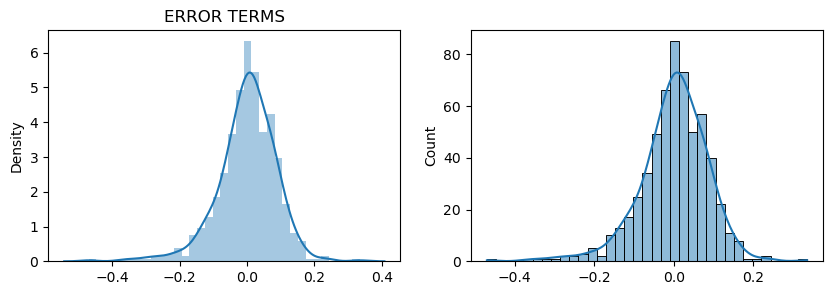

In [73]:
res=(y_train-y_train_prrdict)
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.title('ERROR TERMS')
sns.distplot(res)
plt.subplot(1,2,2)

sns.histplot(res,kde='reg')
plt.show()

**FROM THE GRAPH WE COME TO KNOW THAT OUR ERROR TERMS ARE NORMALLY DISTRIBUTED FROM THAT WE COME TO KNOW WHAT OUR MODEL IS GOOD**

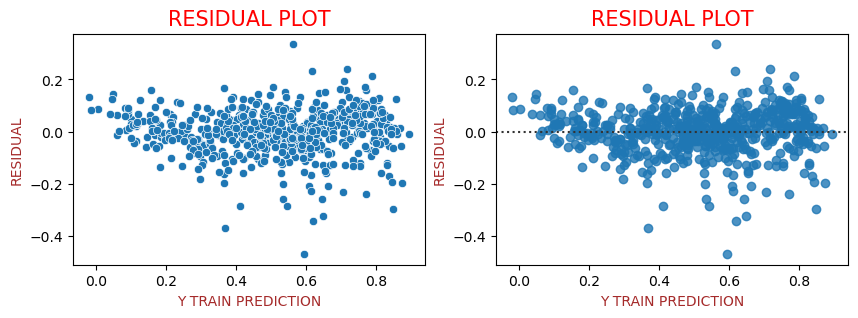

In [74]:

plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
plt.title('RESIDUAL PLOT',fontdict={'color':'RED','fontsize':15},loc='center')

plt.xlabel(xlabel='Y TRAIN PREDICTION',fontdict={'color':'brown','fontsize':10})
sns.scatterplot(x=y_train_prrdict,y=res)
plt.ylabel(ylabel='RESIDUAL',fontdict={'color':'brown','fontsize':10})

plt.subplot(1,2,2)
plt.title('RESIDUAL PLOT',fontdict={'color':'RED','fontsize':15},loc='center')

sns.residplot(x=y_train_prrdict,y=res)
plt.xlabel(xlabel='Y TRAIN PREDICTION',fontdict={'color':'brown','fontsize':10})
plt.ylabel(ylabel='RESIDUAL',fontdict={'color':'brown','fontsize':10})


plt.show()

- **FROM THE GRAPH WE COME TO KNOW THAT IT ACCEPTING THE LINEAR REGRESSION ASSUMPTION THAT HOMOSCEDASTICITY IS THERE THERE ARE IN A UNIFORM LINE**

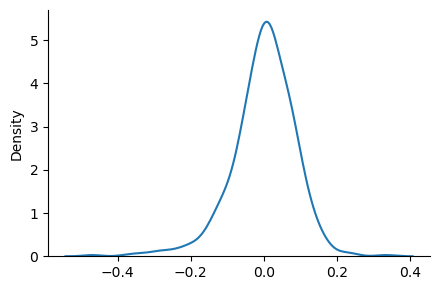

In [75]:

sns.displot(res,kind='kde',height=3,aspect=1.5)
plt.show()

# PREDICTION AND EVALUATION

In [76]:
df_day_new_test[rescale_list]=scaler.transform(df_day_new_test[rescale_list])
df_day_new_test.head(3)

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_MON,weekday_SAT,weekday_SUNDAY,weekday_THUR,weekday_TUES,weekday_WED,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION,2019
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [77]:
df_day_new_test.describe()

,temp,atemp,humidity,windspeed,count,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_MON,weekday_SAT,weekday_SUNDAY,weekday_THUR,weekday_TUES,weekday_WED,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION,2019
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.569603,0.542752,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,0.061644,0.075342,...,0.102740,0.219178,0.116438,0.089041,0.123288,0.178082,0.746575,0.034247,0.315068,0.445205
std,0.238088,0.222120,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,0.241335,0.264852,...,0.304664,0.415114,0.321854,0.285783,0.329899,0.383899,0.436469,0.182488,0.466142,0.498699
min,0.046591,0.025950,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359075,0.346732,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
50%,0.560248,0.544652,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.801929,0.743337,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
y_test=df_day_new_test.pop('count')

X_test=df_day_new_test

In [79]:
print('the shhape of y test is',y_test.shape)
print('the shhape of X test is',X_test.shape)

the shhape of y test is (146,)
the shhape of X test is (146, 29)


In [80]:
X_test_sm=sm.add_constant(X_test)
X_test_sm

,const,temp,atemp,humidity,windspeed,season_spring,season_summer,season_winter,month_Aug,month_Dec,...,weekday_MON,weekday_SAT,weekday_SUNDAY,weekday_THUR,weekday_TUES,weekday_WED,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION,2019
184,1.0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
535,1.0,0.901354,0.842587,0.610133,0.153728,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
299,1.0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
221,1.0,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
152,1.0,0.817246,0.741471,0.314298,0.537414,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.0,0.879548,0.819364,0.610133,0.322193,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
719,1.0,0.333364,0.292320,0.573637,0.713904,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
3,1.0,0.175530,0.174649,0.608434,0.253659,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
392,1.0,0.319864,0.324627,0.559896,0.362295,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [81]:
X_test_sm=X_test_sm.drop(['atemp','humidity','month_Aug','month_Feb','month_Jun','month_Marc','month_May','month_Oct','holiday_yes','weekday_MON','weekday_SAT','weekday_THUR','weekday_WED'],axis=1)

In [82]:
print('the test of the columns are ',X_test_sm.shape)
X_test_sm.head(3)

the test of the columns are  (146, 17)


,const,temp,windspeed,season_spring,season_summer,season_winter,month_Dec,month_Jan,month_July,month_Nov,month_Sept,weekday_SUNDAY,weekday_TUES,workingday_yes,weather_LITE BAD CONDITION,weather_LITE GOOD CONDITION,2019
184,1.0,0.831783,0.084219,0,0,0,0,0,1,0,0,0,1,0,0,1,0
535,1.0,0.901354,0.153728,0,1,0,0,0,0,0,0,0,0,1,0,0,1
299,1.0,0.511964,0.334206,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [83]:
X_train_sm.shape,X_test_sm.shape

((584, 17), (146, 17))

In [84]:
y_test_prrdict=lr_model.predict(X_test_sm)

In [85]:
y_test_prrdict

184    0.400647
535    0.898869
299    0.449170
221    0.592897
152    0.569274
         ...   
219    0.574242
719    0.307610
3      0.168472
392    0.453819
360    0.137442
Length: 146, dtype: float64

## PERFORMING $R^2$
 

- **from sklearn.metrics import r2_score**
- **r2_score(y_test, y_pred)**

In [98]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [87]:
r2_score(y_true=y_test,y_pred=y_test_prrdict)

0.7760830156048715

In [88]:
print('THE R SQUARED VALUE OF TRAINING SET IS :',r2_score(y_true=y_train,y_pred=y_train_prrdict))
print('THE R SQUARED VALUE OF TEST SET IS :',r2_score(y_true=y_test,y_pred=y_test_prrdict))

THE R SQUARED VALUE OF TRAINING SET IS : 0.8519229478939757
THE R SQUARED VALUE OF TEST SET IS : 0.7760830156048715


### There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.

### Similarly, there is also no correct answer as to what R2 should be

In [106]:
print(f'THE MEAN SQUARED ERROR OF TRAIN IS: {mean_squared_error(y_true=y_train,y_pred=y_train_prrdict)}')
print('THE MEAN SQUARED ERROR OF TEST IS:',mean_squared_error(y_true=y_test,y_pred=y_test_prrdict))

THE MEAN SQUARED ERROR OF TRAIN IS: 0.007505910601061811
THE MEAN SQUARED ERROR OF TEST IS: 0.010066294557928523


In [99]:
mean_absolute_error(y_true=y_test,y_pred=y_test_prrdict),mean_absolute_error(y_true=y_train,y_pred=y_train_prrdict)

(0.07703360662579749, 0.06347283121621669)

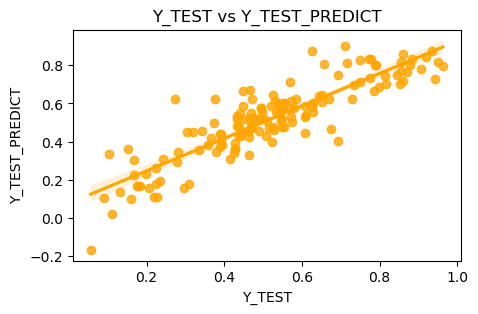

In [90]:
plt.figure(figsize=(5,3))
plt.title('Y_TEST vs Y_TEST_PREDICT')

sns.regplot(x=y_test,y=y_test_prrdict,color='Orange')
plt.xlabel('Y_TEST')
plt.ylabel('Y_TEST_PREDICT')
plt.show()

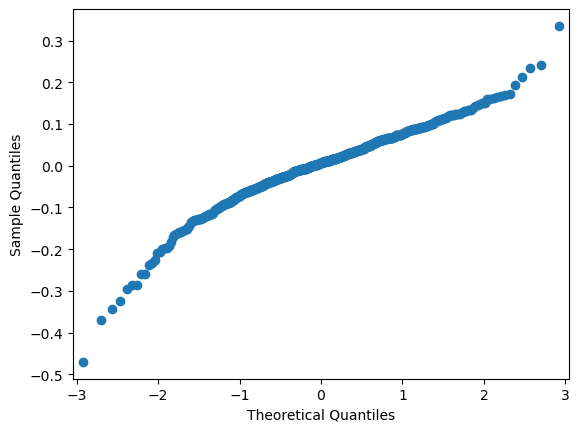

In [91]:
sm.qqplot(res)


###  THE EQUATION WILL BE LIKE THIS

$Count = 0.1990 + (temp * 0.4376) + (windspeed * -0.1577) +(Season spring *0.0357)+ (Season summer * 0.0357) + (Season winter * 0.0989	)+ (Month Dec * -0.0577)+ (Month Jan * -0.0498)+ (Month july * -0.0469)+ (Month Nov * -0.0603)  + (Month Sept * 0.0576)+(weekday sunDay * 0.0687) +  (weekday  TuesDay * -0.0205)+ (workingday Yes * 0.0617) + (Weather lite bad * -0.3023)+ (Weather lite good * -0.08817)  + (Year 2019 * 0.2323)$

- **IF A TEMP INCRESE BY ONE UNIT THEN THE BIKE DEMAND BY 0.4376 UNIT**
- **IF A WINDSPEED INCRESE BY ONE UNIT THEN THE BIKE DEMAND DECREASE BY 0.1577 UNIT**
- **IF A SEASON SPRING INCRESE BY ONE UNIT THEN THE BIKE DEMAND INCREASE BY 0.0357 UNIT**
- **IF A SEASON WINTER INCRESE BY ONE UNIT THEN THE BIKE DEMAND INCREASE BY 0.0.0989 UNIT ETC.........**


In [92]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.9
Date:                Tue, 13 Dec 2022   Prob (F-statistic):          7.18e-223
Time:                        10:48:23   Log-Likelihood:                 599.82
No. Observations:                 584   AIC:                            -1166.
Df Residuals:                     567   BIC:                            -1091.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1990      0.030      6.601      0.000       0.140       0.258
temp                            0.4376      0.033     13.271      0.000       0.373       0.502
windspeed                      -0.1577      0.023     -6.896      0.000      -0.203      -0.113
season_spring                  -0.0792      0.019     -4.091      0.000      -0.117      -0.041
season_summer                   0.0357      0.014      2.566      0.011       0.008       0.063
season_winter                   0.0989      0.016      6.258      0.000       0.068       0.130
month_Dec                      -0.0577      0.015     -3.729      0.000      -0.088      -0.027
month_Jan                      -0.0498      0.016     -3.031      0.003      -0.082      -0.018
month_July                     -0.0469      0.017     -2.772      0.006      -0.080      -0.014
month_Nov                      -0.0603      0.017     -3.497      0.001      -0.094      -0.026
month_Sept                      0.0576      0.015      3.762      0.000       0.028       0.088
weekday_SUNDAY                  0.0687      0.013      5.370      0.000       0.044       0.094
weekday_TUES                   -0.0205      0.010     -1.957      0.051      -0.041    7.78e-05
workingday_yes                  0.0617      0.010      6.322      0.000       0.043       0.081
weather_LITE BAD CONDITION     -0.3023      0.023    -13.216      0.000      -0.347      -0.257
weather_LITE GOOD CONDITION    -0.0817      0.008    -10.395      0.000      -0.097      -0.066
2019                            0.2323      0.007     31.642      0.000       0.218       0.247
==============================================================================
Omnibus:                      102.331   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              294.970
Skew:                          -0.849   Prob(JB):                     8.87e-65
Kurtosis:                       6.039   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### FINAL CONCULSION :

- **1.OUR TRAINING DATA SET R2 SQUARED VALUE IS 0.851**
- **2. OUR TESTING DATA SET R2 SQUARED VALUE IS 0.776**
- **FROM THIS WE COME TO KNOW THAT OUR MODEL PERFOMED GOOD**

### THESE ARE THE SOME FEATURE VARIABLES WHICH IS USED FOR BIKE BOOKING OR TO TAKE RENT OR INCRESE THE DEMAND OF BIKE
- **<FONT COLOR='RED'>FEATURE	VARAIBLES</FONT>**
   - **0	year	2019**
   - **1	season_spring**	
   - **2	TEMPRATURE**	
   - **3	month_Nov**
   - **4	month_Sept**	
   - **5	holiday_yes**
   - **6	weekday_MON**
   - **7	weather_LITE GOOD CONDITION**
   - **8    WORKING_DAYS**